## 鸢尾花分类

### 加载数据

In [2]:
from sklearn import datasets
iris_dataset = datasets.load_iris()

### 数据查看

In [26]:
# 数据集特征总体描述
iris_dataset.DESCR.split('\n')

['.. _iris_dataset:',
 '',
 'Iris plants dataset',
 '--------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 150 (50 in each of three classes)',
 '    :Number of Attributes: 4 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 '        - sepal length in cm',
 '        - sepal width in cm',
 '        - petal length in cm',
 '        - petal width in cm',
 '        - class:',
 '                - Iris-Setosa',
 '                - Iris-Versicolour',
 '                - Iris-Virginica',
 '                ',
 '    :Summary Statistics:',
 '',
 '    ============== ==== ==== ======= ===== ====================',
 '                    Min  Max   Mean    SD   Class Correlation',
 '    ============== ==== ==== ======= ===== ====================',
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826',
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194',
 '    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)',
 '    pe

In [27]:
# 数据集大小
iris_dataset.data.shape

(150, 4)

In [28]:
# 标签名
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
# 标签数据
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
# 数据特征
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
# 数据集整体情况
iris_dataset.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 数据探索

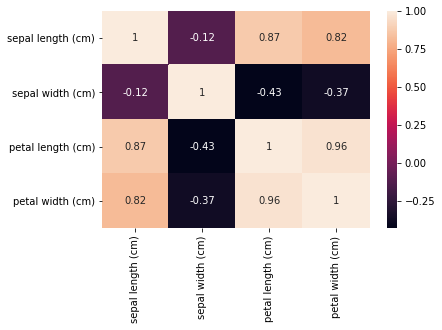

In [39]:
# 数据特征可视化
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
corr = dataset.corr()
plt.figure()
sns.heatmap(corr,annot=True)
plt.savefig('./iris.png')
plt.show()

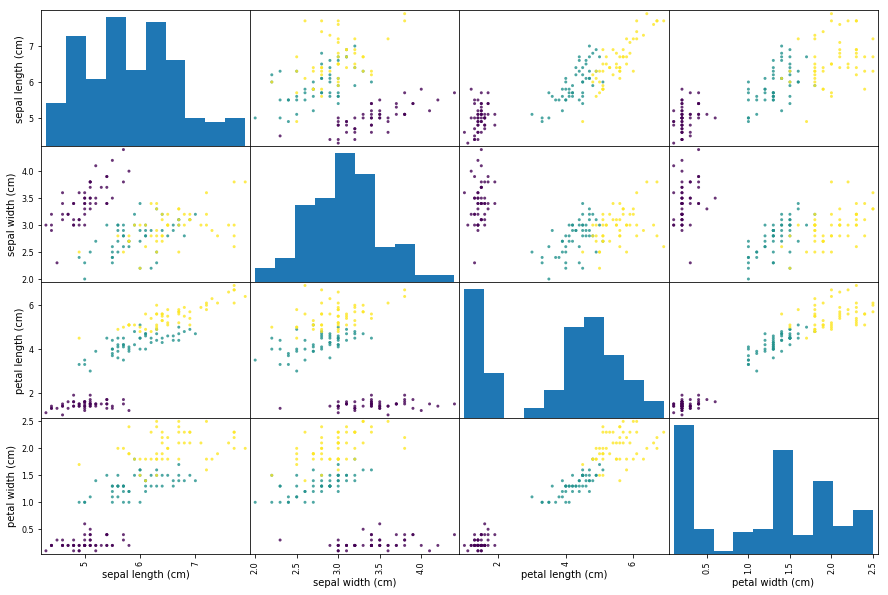

In [61]:
# 散点图矩阵
# c=iris_dataset.target,按标签类别着色
pd.plotting.scatter_matrix(dataset,figsize=(15,10), c=iris_dataset.target, alpha=0.8)
plt.show()

In [40]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 训练集准备

In [43]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_dataset.data, iris_dataset.target, test_size=0.3)

### 模型筛选和训练

### KNN模型

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### 模型参数信息

In [74]:
knn_model.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')>

### 模型评估

In [67]:
train_score = knn_model.score(train_X, train_y)
test_score = knn_model.score(test_X, test_y)
print('train_score:', train_score)
print('test_score:', test_score)

train_score: 0.9809523809523809
test_score: 0.9555555555555556


### 模型预测

In [70]:
import numpy as np
predict_X = np.array([[5, 2.9, 1, 0.2], [4, 2, 1, 0.5], [1, 2, 5, 0.8]])
prediction = knn_model.predict(predict_X)
print('prediction:', prediction)
print('prediction_target:', iris_dataset.target_names[prediction])

prediction: [0 0 1]
prediction_target: ['setosa' 'setosa' 'versicolor']


### 模型改进

In [84]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
predict_X = np.array([[5, 2.9, 1, 0.2], [4, 2, 1, 0.5], [1, 2, 5, 0.8]])
for n in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(train_X, train_y)
    train_score = knn_model.score(train_X, train_y)
    test_score = knn_model.score(test_X, test_y)
    print('n_neighbors:', n)
    print('train_score:', train_score)
    print('test_score:', test_score)
    prediction = knn_model.predict(predict_X)
    print('prediction:', prediction)
    print('prediction_target:', iris_dataset.target_names[prediction])
    print('')

n_neighbors: 1
train_score: 1.0
test_score: 0.9555555555555556
prediction: [0 0 2]
prediction_target: ['setosa' 'setosa' 'virginica']

n_neighbors: 2
train_score: 0.9809523809523809
test_score: 0.9555555555555556
prediction: [0 0 1]
prediction_target: ['setosa' 'setosa' 'versicolor']

n_neighbors: 3
train_score: 0.9809523809523809
test_score: 0.9555555555555556
prediction: [0 0 1]
prediction_target: ['setosa' 'setosa' 'versicolor']

n_neighbors: 4
train_score: 0.9809523809523809
test_score: 0.9555555555555556
prediction: [0 0 1]
prediction_target: ['setosa' 'setosa' 'versicolor']

n_neighbors: 5
train_score: 0.9809523809523809
test_score: 0.9555555555555556
prediction: [0 0 1]
prediction_target: ['setosa' 'setosa' 'versicolor']

n_neighbors: 6
train_score: 0.9714285714285714
test_score: 0.9777777777777777
prediction: [0 0 1]
prediction_target: ['setosa' 'setosa' 'versicolor']

n_neighbors: 7
train_score: 0.9809523809523809
test_score: 0.9777777777777777
prediction: [0 0 1]
prediction_t